In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lab 4

In [4]:
x = print(5)

5


In [6]:
type(x)

NoneType

## Table Review: Welcome Survey

In [ ]:
welcome = Table.read_table('welcome_survey_v1.csv')
welcome.show(5)

In [ ]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

In [ ]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

In [ ]:
# Second way
np.count_nonzero(welcome.column('Hours of sleep') >= 8)

In [ ]:
# Third way
np.sum(welcome.column('Hours of sleep') >= 8)

In [ ]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

In [ ]:
# Second way
two_col = welcome.drop('Handedness', 'Extraversion', 'Pant leg')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

## Census ##

In [8]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [9]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [10]:
# Make things easier to read
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [11]:
# Sort by age
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493
0,1,3957888,3962123
1,1,2020332,2023253
2,1,1937556,1938870
0,2,4090862,3957772
1,2,2088685,2022502
2,2,2002177,1935270
0,3,4111920,4005190


In [12]:
# Sort by age (another way)
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569
0,100,54409,72197
1,100,9351,13729
2,100,45058,58468
0,99,32178,41828
1,99,6104,9037
2,99,26074,32791
0,98,47037,60185


In [13]:
simple.group(1)

AGE,count
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


## Line Plots ##

In [17]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999))

In [18]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')

In [19]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


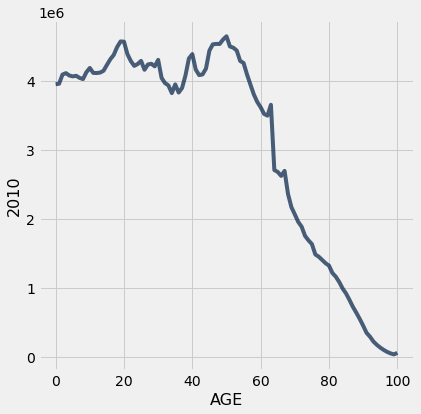

In [20]:
everyone.plot('AGE', '2010')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

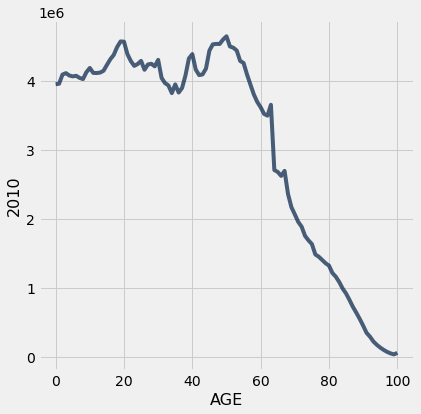

In [21]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


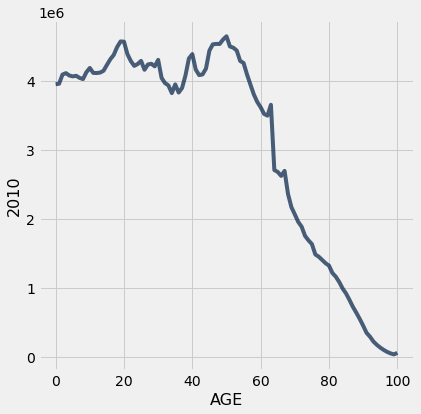

In [22]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

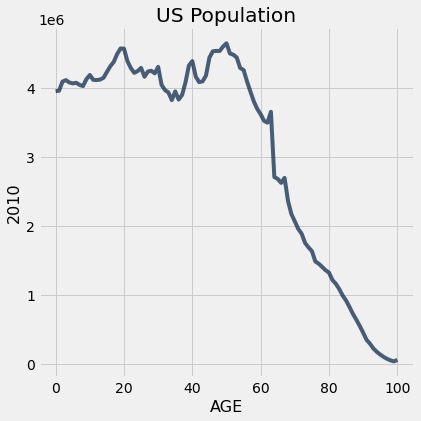

In [23]:
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL

datascience.tables.Table

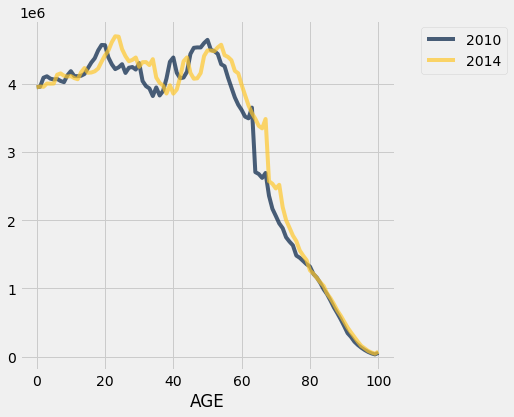

In [26]:
# Age distribution for two different years
everyone.plot('AGE')

## Males and Females in 2014 ##

In [28]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [29]:
pop_2014 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),
    'Females', females.column('2014')
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


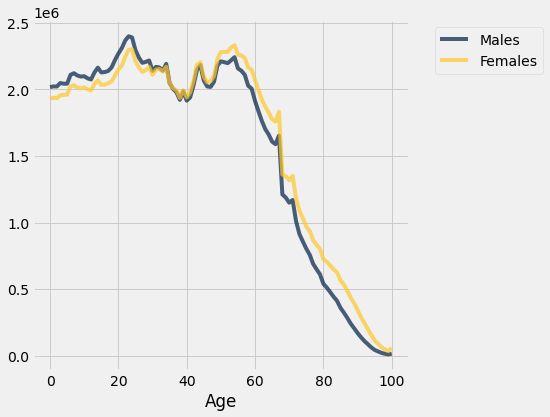

In [30]:
pop_2014.plot('Age')

In [31]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([ 48.89366444,  48.93512897,  48.89796583,  48.85091594,
        48.95654945,  48.9752945 ,  48.95625723,  48.91092922,
        48.89890191,  48.93212091,  48.9734048 ,  48.99969062,
        48.99606517,  48.95633512,  48.86619665,  48.88170995,
        48.86445062,  48.88986227,  48.76308397,  48.668799  ,
        48.63932932,  48.5330796 ,  48.66269094,  48.92327135,
        49.03933504,  49.08996242,  49.16509171,  49.21162965,
        49.28169646,  49.44899983,  49.65375766,  49.75983547,
        49.86565039,  49.93824999,  49.74770193,  49.99251351,
        50.05521355,  50.20280862,  50.18189092,  50.10049432,
        50.31587643,  50.47966604,  50.40624483,  50.42907187,
        50.23118137,  50.32445422,  50.37830234,  50.53327291,
        50.51106084,  50.55818402,  50.75941276,  50.86725098,
        50.93664868,  51.06392595,  50.97417608,  51.18857886,
        51.29709649,  51.45934869,  51.62031101,  51.70400468,
        51.97408419,  52.08985538,  52.15439053,  52.36

In [32]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.894,  48.935,  48.898,  48.851,  48.957,  48.975,  48.956,
        48.911,  48.899,  48.932,  48.973,  49.   ,  48.996,  48.956,
        48.866,  48.882,  48.864,  48.89 ,  48.763,  48.669,  48.639,
        48.533,  48.663,  48.923,  49.039,  49.09 ,  49.165,  49.212,
        49.282,  49.449,  49.654,  49.76 ,  49.866,  49.938,  49.748,
        49.993,  50.055,  50.203,  50.182,  50.1  ,  50.316,  50.48 ,
        50.406,  50.429,  50.231,  50.324,  50.378,  50.533,  50.511,
        50.558,  50.759,  50.867,  50.937,  51.064,  50.974,  51.189,
        51.297,  51.459,  51.62 ,  51.704,  51.974,  52.09 ,  52.154,
        52.362,  52.368,  52.498,  52.532,  52.568,  52.907,  53.154,
        53.405,  53.592,  53.929,  54.4  ,  54.642,  54.728,  55.249,
        55.702,  56.179,  56.816,  57.278,  57.97 ,  58.654,  59.426,
        60.31 ,  61.159,  62.261,  63.24 ,  64.423,  65.71 ,  66.783,
        67.659,  69.009,  69.972,  71.585,  72.745,  74.225,  75.542,
        77.322,  78.

In [33]:
# Add female percent to our table
pop_2014 = pop_2014.with_column('Percent female', pct_female)
pop_2014

Age,Males,Females,Percent female
0,2017857,1930493,48.894
1,2023253,1938870,48.935
2,2022502,1935270,48.898
3,2048618,1956572,48.851
4,2043498,1959950,48.957
5,2043467,1961391,48.975
6,2110328,2024024,48.956
7,2122240,2031760,48.911
8,2105122,2014402,48.899
9,2097272,2009560,48.932


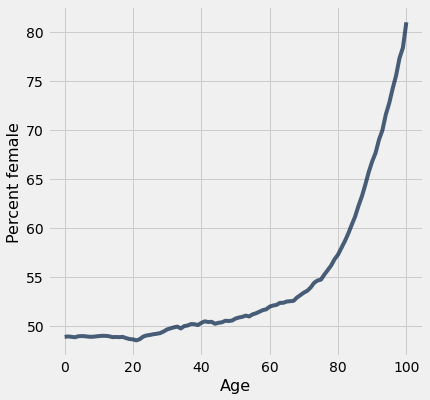

In [34]:
pop_2014.plot('Age', 'Percent female')

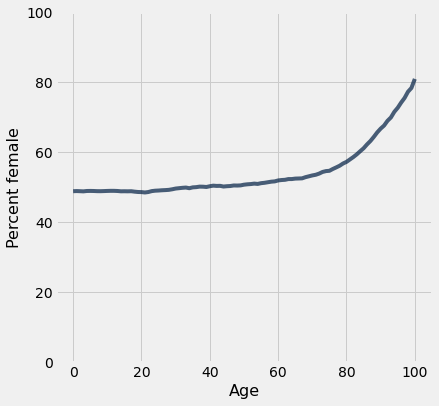

In [35]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100); 

## Scatter Plots ##

In [36]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


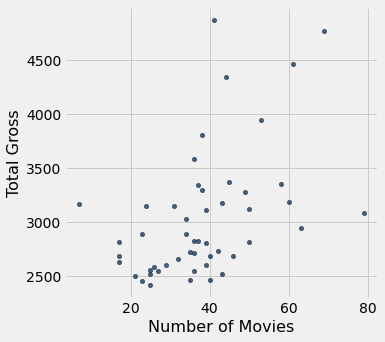

In [38]:
actors.scatter('Number of Movies', 'Total Gross')

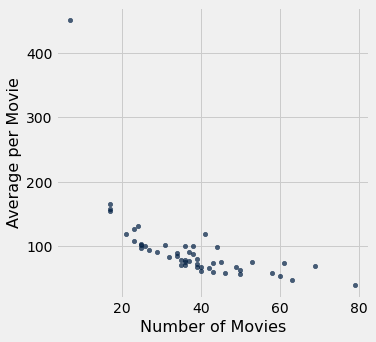

In [39]:
actors.scatter('Number of Movies', 'Average per Movie')

In [40]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [41]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [42]:
top_movies.group(1)

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [48]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [49]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


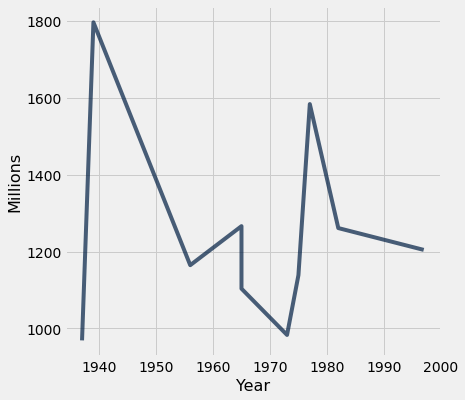

In [52]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

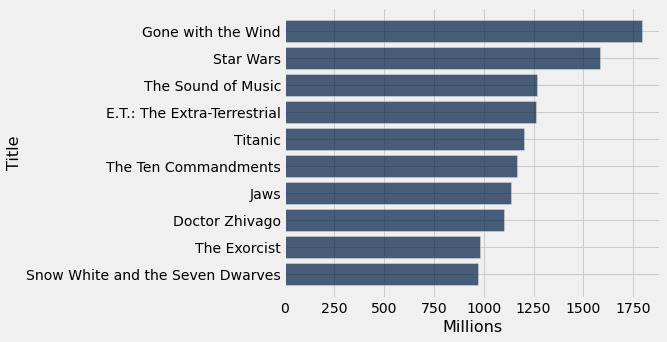

In [55]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted)

## Categorical Distribution ##

In [56]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


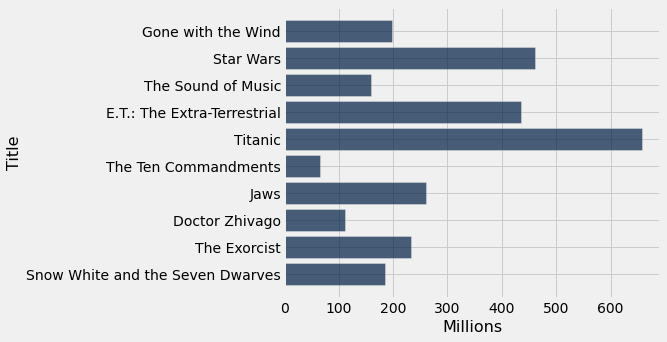

In [57]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
top_movies.take(np.arange(10)).barh('Title', 'Millions')

In [58]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [59]:
studio_distribution = studios.group('Studio')

In [60]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [ ]:
sum(studio_distribution.column('count'))

## Bar Charts ##

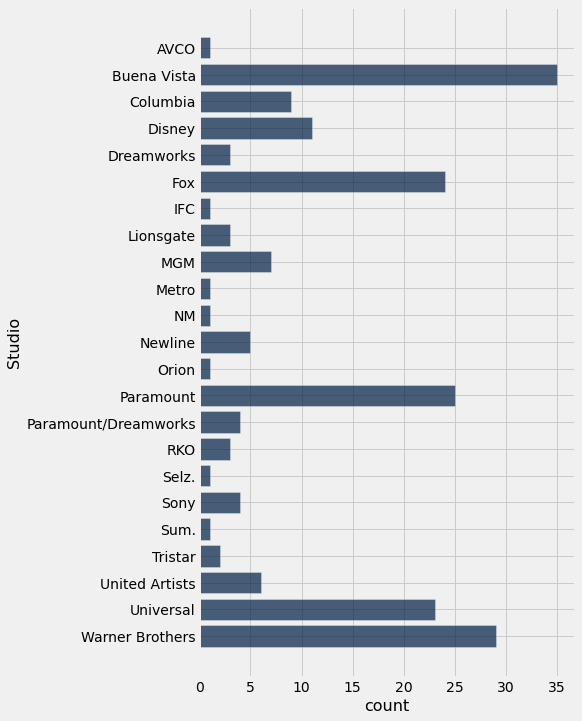

In [61]:
studio_distribution.barh('Studio')

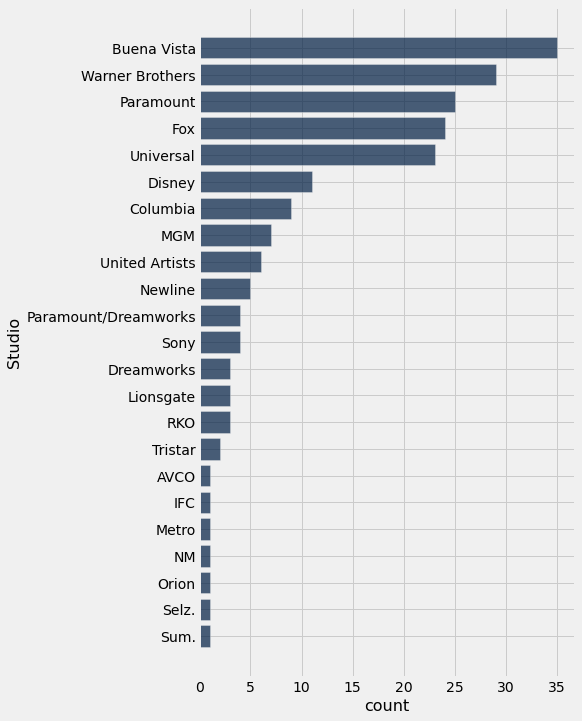

In [62]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [75]:
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [76]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,84
Star Wars,Fox,460998007,1583483200,1977,460.998,46
The Sound of Music,Fox,158671368,1266072700,1965,158.671,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,41
Titanic,Paramount,658672302,1204368000,1997,658.672,26
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,67
Jaws,Universal,260000000,1138620700,1975,260,48
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,58
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,86


## Binning ##

In [77]:
min(ages), max(ages)

(6, 102)

In [81]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 105)

In [82]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
105,0


In [83]:
sum(binned_data.column('Age count'))

200

In [84]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,79
25,69
50,42
75,9
100,0


In [87]:
np.arange(0, 60, 25)

array([ 0, 25, 50])

In [85]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,79
25,72
50,0


In [86]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,50
The Sting,Universal,156000000,792480000,1973,156,50
American Graffiti,Universal,115000000,584200000,1973,115,50


## Histograms ##

In [88]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 105])

In [89]:
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
105,0


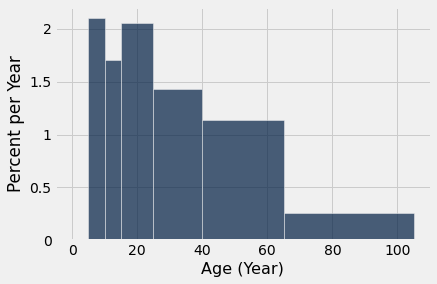

In [90]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

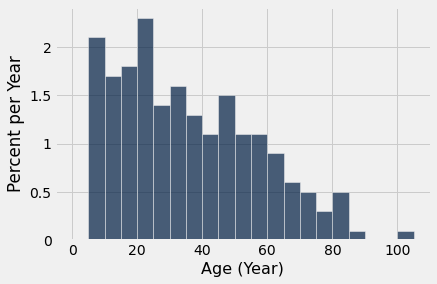

In [93]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 5), unit = 'Year')

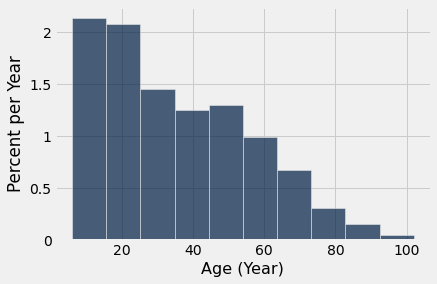

In [92]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [94]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [95]:
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
105,0,0


## Height ##

### Question: What is the height of the [40, 65] bin?

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

In [96]:
3/20*100/15


1.0

In [97]:
8/20*100/10

4.0

In [98]:
9/20*100/60

0.75

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [ ]:
bin_lefts

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

## Visualization Review: Welcome Survey ##

In [ ]:
survey = Table.read_table('welcome_survey_v1.csv')
survey

### Categorical Bar Charts

In [ ]:
handedness = survey.group('Handedness')
handedness

In [ ]:
handedness.barh('Handedness')

### Numerical Histograms

In [ ]:
survey.hist('Extraversion')

In [ ]:
survey.hist('Hours of sleep')

In [ ]:
max(survey.column('Hours of sleep'))

In [ ]:
sleep_bins = np.arange(4,12,0.5)

In [ ]:
survey.where(
    'Pant leg',are.containing('Right')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Right Leg First');

survey.where(
    'Pant leg',are.containing('Left')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Left Leg First');

In [ ]:
survey.hist('Hours of sleep', bins=sleep_bins)

In [ ]:
survey.bin('Hours of sleep', bins=make_array(0,8,15))

In [ ]:
417/(417 + 915) * 100

## Histogram Review: Heights and Heredity ##

In [99]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [150]:
def predict(midparentHeight, gender):
    closeTable = galton.where('gender', gender).where("midparentHeight", are.between(midparentHeight-5,midparentHeight+5))
    childHeightColumn = closeTable.column('childHeight')
    return round(np.average(childHeightColumn),2)

In [152]:
predict(75.43, 'female')

65.849999999999994

In [153]:
galton.with_column('prediction', galton.apply(predict, 'midparentHeight', 'gender'))

family,father,mother,midparentHeight,children,childNum,gender,childHeight,prediction
1,78.5,67,75.43,4,1,male,73.2,71.18
1,78.5,67,75.43,4,2,female,69.2,65.85
1,78.5,67,75.43,4,3,female,69,65.85
1,78.5,67,75.43,4,4,female,69,65.85
2,75.5,66.5,73.66,4,1,male,73.5,69.98
2,75.5,66.5,73.66,4,2,male,72.5,69.98
2,75.5,66.5,73.66,4,3,female,65.5,64.67
2,75.5,66.5,73.66,4,4,female,65.5,64.67
3,75,64,72.06,2,1,male,71,69.49
3,75,64,72.06,2,2,female,68,64.35


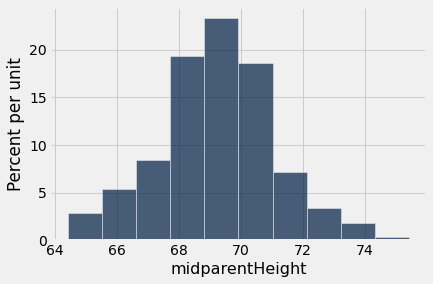

In [100]:
galton.hist('midparentHeight')

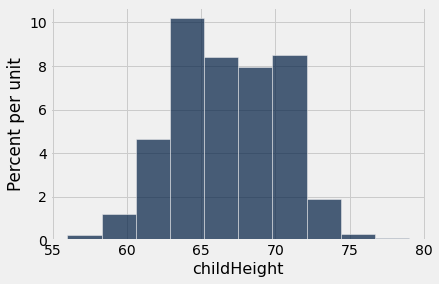

In [101]:
galton.hist('childHeight')

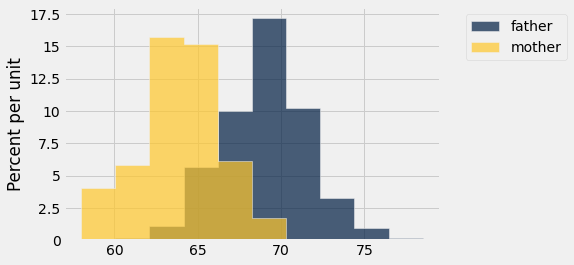

In [103]:
galton.hist('father', 'mother')

## Functions ##

In [104]:
4 * 3

12

In [105]:
8 * 3

24

In [106]:
def triple(x):
    return 3 * x

In [107]:
triple(4)

12

In [108]:
triple(8)

24

In [ ]:
triple(3)

In [109]:
num = 4

In [110]:
triple(num)

12

In [111]:
triple(num * 5)

60

### Conversion

In [117]:
def convert(x):
    return (x - 32) * 5 / 9
convert(60)

51.22222222222222

In [118]:
convert(69)

20.555555555555557

In [119]:
convert(60)

15.555555555555555

### Note About Scopes

In [120]:
x

In [121]:
x = 5

In [122]:
triple(2 * x)

30

In [123]:
x

5

### Type Agnostic

In [124]:
triple('ha')

'hahaha'

In [125]:
triple(np.arange(4))

array([0, 3, 6, 9])

In [127]:
sum(make_array(5,2))

7

### Discussion Question

In [128]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [129]:
percent_of_total(make_array(1,2,3,4))

array([ 10.,  20.,  30.,  40.])

In [130]:
percent_of_total(make_array(1, 213, 38))

array([  0.4 ,  84.52,  15.08])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [ ]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [ ]:
hypotenuse(9, 12)

In [ ]:
hypotenuse(2, 2)

## Apply ##

In [131]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [132]:
def cap_at_1980(x):
    return min(x, 1980)

In [133]:
cap_at_1980(1975)

1975

In [134]:
cap_at_1980(1991)

1980

In [137]:
ages.with_column("cap at 1980", ages.apply(cap_at_1980, 'Birth Year'))

Person,Birth Year,cap at 1980
Jim,1985,1980
Pam,1988,1980
Michael,1967,1967
Creed,1904,1904


In [138]:
def name_and_age(name, year):
    age = 2023 - year
    return name + ' is ' + str(age)

In [140]:
ages.with_column("Hello", ages.apply(name_and_age, 'Person', 'Birth Year'))

Person,Birth Year,Hello
Jim,1985,Jim is 38
Pam,1988,Pam is 35
Michael,1967,Michael is 56
Creed,1904,Creed is 119


In [ ]:
# [0,4) and [4,18)

In [154]:
zeroTwo = 2 * 17.49
twoFour = 2 * 11.39
fourTwelf = 8 * 3.6
TwelfEighteen = 6 * 1.6

In [155]:
zeroTwo + twoFour

57.76

In [156]:
fourTwelf + TwelfEighteen

38.400000000000006